<a href="https://colab.research.google.com/github/Alindaive/Aalzheimer_detection/blob/main/Alzheimer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix 
import itertools 
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from itertools import cycle

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
g = !ls gdrive/MyDrive/archive.zip 

In [ ]:
!unzip /content/gdrive/MyDrive/archive.zip -d /content/Dataset/

In [6]:
data = "../content/Dataset/AugmentedAlzheimerDataset"

In [7]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) 

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [8]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../content/Dataset/AugmentedAlzheimerDataset").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [9]:
image_df

,Filepath,Label
0,../content/Dataset/AugmentedAlzheimerDataset/M...,MildDemented
1,../content/Dataset/AugmentedAlzheimerDataset/M...,MildDemented
2,../content/Dataset/AugmentedAlzheimerDataset/M...,MildDemented
3,../content/Dataset/AugmentedAlzheimerDataset/M...,MildDemented
4,../content/Dataset/AugmentedAlzheimerDataset/M...,MildDemented
...,...,...
33979,../content/Dataset/AugmentedAlzheimerDataset/V...,VeryMildDemented
33980,../content/Dataset/AugmentedAlzheimerDataset/V...,VeryMildDemented
33981,../content/Dataset/AugmentedAlzheimerDataset/V...,VeryMildDemented
33982,../content/Dataset/AugmentedAlzheimerDataset/V...,VeryMildDemented


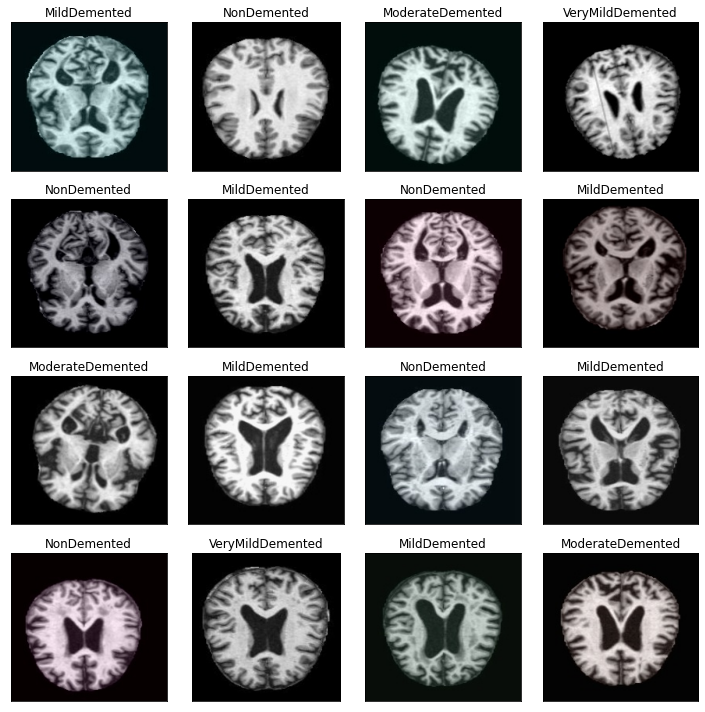

In [10]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

In [12]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    data , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [13]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10)

Epoch 1/10
850/850 [==============================] - 733s 862ms/step - loss: 0.8653 - accuracy: 0.6013 - val_loss: 0.7232 - val_accuracy: 0.6651
Epoch 2/10
850/850 [==============================] - 730s 859ms/step - loss: 0.5242 - accuracy: 0.7731 - val_loss: 0.4391 - val_accuracy: 0.8093
Epoch 3/10
850/850 [==============================] - 729s 858ms/step - loss: 0.3419 - accuracy: 0.8566 - val_loss: 0.3495 - val_accuracy: 0.8539
Epoch 4/10
850/850 [==============================] - 728s 857ms/step - loss: 0.2340 - accuracy: 0.9043 - val_loss: 0.2642 - val_accuracy: 0.8893
Epoch 5/10
850/850 [==============================] - 728s 857ms/step - loss: 0.1647 - accuracy: 0.9340 - val_loss: 0.2604 - val_accuracy: 0.8969
Epoch 6/10
850/850 [==============================] - 733s 862ms/step - loss: 0.1225 - accuracy: 0.9533 - val_loss: 0.4215 - val_accuracy: 0.8649
Epoch 7/10
850/850 [==============================] - 735s 864ms/step - loss: 0.1058 - accuracy: 0.9598 - val_loss: 0.2715 -

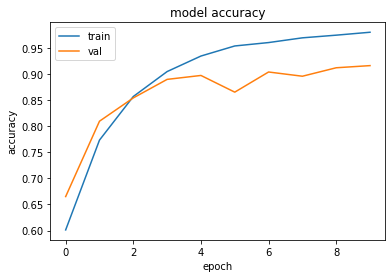

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

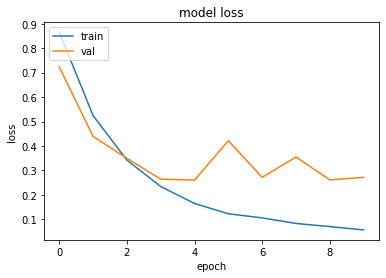

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# saving the model +++
model.save('MyRiceModel_h5',save_format='h5')

In [ ]:
# loaing the model +++
model = tf.keras.models.load_model('MyModel_h5')
model = tf.keras.models.load_model(
       'MyRiceModel_h5',
       custom_objects={'KerasLayer':hub.KerasLayer}
)